# Perceptron  algorithm

## Definition

The perceptron is a supervised learning algorithm of binary classifiers. It was invented in 1957 by Frank Rosenblatt1 at the Cornell University Aeronautics Laboratory. If the problem is linearly separable, a theorem ensures that the perceptron rule makes it possible to find a separator between the two classes.

## Algorithm

Input: A sequence of training examples $(x_1 , y_1 ), (x_2 , y_2 ),...(x_m,y_m)$ <br>
where all $x_i \in \mathbb{R}^{n} , y_i \in \{-1,1\}$ <br>
• Initialize $w_0 =$ random $w \in \mathbb{R}^{n} $ <br>
• For each training example $(x_i , y_i)$: <br>
– Predict $y’ = sgn(w_t^{T}.x_i )$ <br>
– If $y_i ≠ y’$: <br>
• Update $w_{t+1}  \leftarrow w_t + (y_i x_i )$ <br>
• Return final weight vector $w$

## Interpretation

For each $k \in \{0,1,2,....m\}$ <br>
$z_k =  x_k $ if $y_k = +1$ and $z_k = - x_k$ if $y_k = -1$

"That is, a correction is done if and only if a misclassification, indicated by $z_k^{T} w_k \leq 0$ occurs.
The addition of vector $z_k$ to $w_k$ moves the weight vector directly toward and perhaps across the hyperplane 
$z_k^{T} w_k = 0$ . The new inner product $z_k^{T} w_{k+1}$ is larger than $z_k^{T} w_k$ by $\lVert z_k \rVert ^{2}$, and the correction $\Delta = w_{k+1} - w_k$ is clearly moving $w_k$ in a good direction, the direction of increasing $z_k^{T} w_k$, as can be seen from the newt Figure. Thus, the perceptron learning rule attempts to find a solution $w*$ for the following system of inequalities $z_k^{T} w > 0$ for $k = 1, 2, ..., m$" <br> <br> 
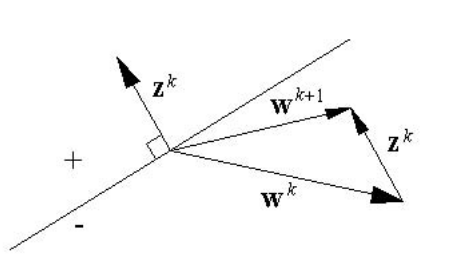 <br>
Fundamentals of Artificial Neural Networks by Mohamad H. Hassoun (MIT Press, 1995)

# Perceptron implementation

 


## Libraries

In [1]:
# matplotlib for visualization of data and separators.
import matplotlib.pyplot as plt
# numpy for linear algebra operations on vectors and matrices.
import numpy as np
# So that the generator of random numbers always gives the same numbers, to avoid having different results at each execution.
np.random.seed(0)

## Train data

### Data defintion

Define the learning data with two features (2D)

In [2]:
X_train=np.array([[-0.72232557, -0.86682292],
        [-0.46936249, -1.45052712],
        [-0.62229699, -0.80261809],
        [ 1.85068362,  1.65668028],
        [-0.30871073, -1.28512984],
        [ 1.52320383,  0.89838313],
        [ 1.45705372, -1.22454469],
        [-0.20163733, -0.33670491],
        [ 0.57098597, -1.36774281],
        [ 0.43999614,  1.49893207],
        [-0.6826726 ,  1.73311864],
        [ 1.62513666, -0.98503269],
        [ 1.18499772,  0.67625894],
        [ 0.29314011, -1.12354835],
        [ 0.61041414,  0.24255405],
        [-0.88145096,  0.64314982],
        [ 0.49850695, -0.82070808],
        [ 0.15872877,  1.35120513],
        [-0.81580377,  0.39439876],
       ])

We define the labels associated with the learning data, it is a binary classification problem, these data are chosen so that we can separate them into two classes linearly by a hyperplane, i.e., we have no noise. 

In [3]:
y_train= np.array([-1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1])
#Check that each point has its own label
X_train.shape[0]==len(y_train)

True

### Data vizualization

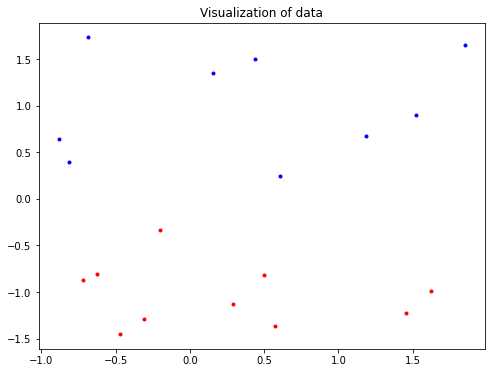

In [4]:
# We do a first visualization of the data.
# We store in the red table the points that have for label -1.
red = X_train[y_train == -1]
# We store in the blue table the points that have for label 1.
blue = X_train[y_train == 1]
# The size of the figure is defined.
fig = plt.figure(figsize=(8, 6))
# Negative points are displayed in red.
plt.plot(red[:, 0], red[:, 1], 'r.')
# We visualize the positive points in blue.
plt.plot(blue[:, 0], blue[:, 1], 'b.')
# A heading is added to the figure.
plt.title("Visualization of data")
# The final figure is displayed.
plt.show()

 A good practice is to add a column of 1 to the data, to manipulate the bias and weights in a single vector $w$ càd use $sgn(w^{T} x)$ instead of $sgn(w^{T} x+b)$.

In [5]:
X_train=np.c_[np.ones(X_train.shape[0]), X_train]

## Loss function

The Ls function is defined to calculate the approximation error at each iteration of the càd algorithm at each update of $w$n and the generalization error after training.

In [6]:
def Loss_function(w,X,y):
    # This variable misclassified is to count the number of misclassified points.
    misclassified=0
    # Run the data point by point.
    for k in range(X.shape[0]):
        # We calculate the label of this point càd the position of the point in relation to the hyerplan defined by w.
    # If wT. x is positive.
        if(np.dot(np.transpose(w),X[k]) > 0):
            # Then the label is positive.
            y_pred=1
        else:
            # Otherwise, the label is negative.
            y_pred=-1
        # We compare the found label with the real label given in the learning data.
        # If it’s not the real label.
        if(y[k]!=y_pred):
            # Increment the misclassified variable by 1.
            misclassified+=1
    # The ratio of the number of misclassified points to the number of points in the learning data is returned. 
    return misclassified/X.shape[0]

## Visaulization function

The visualize_hyperplan function is defined to visualize the position of the separator hyperplane at each $w$ parameter adjustment. In this case of 2D the separating hyperplane is a straight line.

In [7]:
def visualize_hyperplan(wt):
    # We extract the weights.
    w =wt[1:3]
    # We extract the bias.
    b = wt[0]
    # We want to draw a straight line in the plane defined by the two axes x (feature1) and y (feature2) )
    # The line is a linear function. To draw this function you need a set of x_points that are defines on the x axis.
    # linspace Returns numbers spaced evenly over a specified range.
    x_points = np.linspace(-2.5, 2.5) 
    # The images of these points are defined on the y-axis
    # the eqution of the right is wx+b=0 => w1x1+w2x2+b=0 =>  w2x2= -w1x1-b => x2= -(w1/w2)x1- b/w2 .
    y_points = -(w[0] / w[1]) * x_points - b / w[1]
    # Draw the separating line.
    plt.plot(x_points, y_points,c='c')
    # Not forgetting to view the data.
    # The class of red dots.
    plt.plot(red[:, 0], red[:, 1], 'r.')
    # The class of blue dots.
    plt.plot(blue[:, 0], blue[:, 1], 'b.')
    # A heading is added to the figure.
    plt.title("Approximation error ="+str(Loss_function(wt,X_train,y_train)))
    # The figure is displayed
    plt.show()

## Apply Perceptron Learning rule 

Approximation error 0.10526315789473684


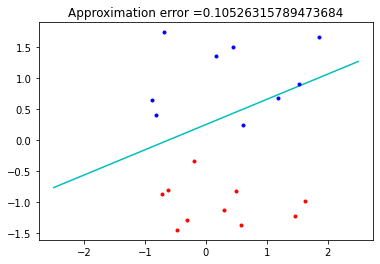

Approximation error 0.0


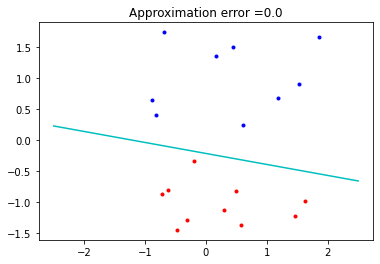

In [8]:
# We give wt an initial random value.
wt=np.random.rand(3)
# The perceptron algorithm.
# As long as the error is not null.
while (Loss_function(wt,X_train,y_train)!=0):
    # Run the data point by point.
    for i in range(X_train.shape[0]):
    # If the product is negative then sign(wT.xi) is different from sign(yi) i.e., the point is misclassified. 
        if(np.dot(X_train[i],np.transpose(wt))*y_train[i])<=0:
            # In this case, adjust the wt parameter by the perceptron rule.
            wt= wt + X_train[i]*y_train[i]
            # Each time wt is modified, the approximation error is displayed.
            print("Approximation error",Loss_function(wt,X_train,y_train))
            # Each time you change wt, you see the separating hyperplane that is a right in this case.
            visualize_hyperplan(wt)
#Optimal w
w_opt= wt

#### The approximation error is very small, there is no underfitting.

## Model testing

## Test data

In [9]:
#Testing data
X_test=np.array([[-0.45290225,  0.73725906],
        [-0.18890174,  0.10266195],
        [ 0.14055728,  1.44716524],
        [ 2.37003419,  1.36292231],
        [-1.4641154 , -0.83274709],
        [-0.73341669, -0.34802686],
        [-1.77068289,  1.47834414],
        [ 0.86229771,  1.72248271],
        [ 2.25629503,  1.75153904]])
# We apply the same preprocessing applied for the training data
X_test=np.c_[np.ones(X_test.shape[0]), X_test]

In [10]:
# Test labels
y_test=np.array([1, 1, 1,1, -1, -1, 1, 1, 1])

In [11]:
# Generalization error
Loss_function(w_opt,X_test,y_test)

0.0

#### The generalization error is very small, there is no overfitting, it is a very good model.